## Seleção de Patch de Maneira Dinâmica

In [52]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [189]:
# Realizando abertura da imagem com a bib PILLOW
path_image = "../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (180, 180), 'RGB')

In [186]:
# im = im.rotate(45)

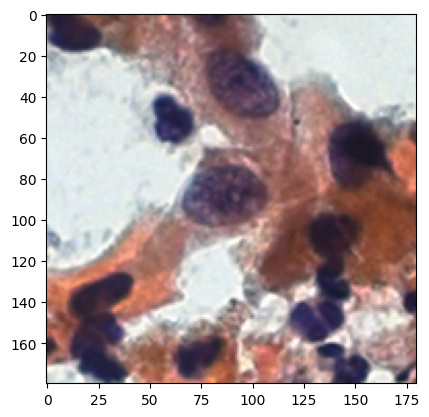

In [190]:
plt.imshow(im)
plt.show()

### Normal Pixels

In [168]:
def visualize_patch_centers(image, centers, patch_size):
    # cria o ax para plotar a img
    fig, ax = plt.subplots(1)
    
    # convert para np
    image_np = np.array(image)
    
    # normaliza a img para intervalo de 0 e 1
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (h, w) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    # Ajusta limite das imagens para proporcao correta
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    
    plt.show()

196
(8, 8)


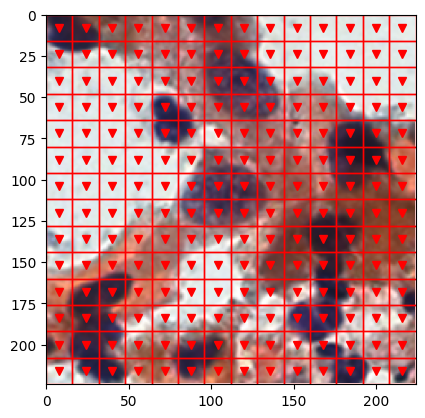

In [164]:
def generate_patch_centers(image_height, image_width, patch_size):
  
    # Stride é o espacamento entre os patches que é o próprio patch_size
    stride = patch_size  
    
    # Qtd de patches na height e no widget (SEM SOBREPOSICAO)
    num_patches_h = image_height // stride
    num_patches_w = image_width // stride
    
    centers_h = []
    centers_w = []
    
    # Todos os patches da coluna
    for i in range(num_patches_h):
      centers_h.append((i * stride + stride // 2))
    
    # Todos os patches da largura
    for j in range(num_patches_w):
      centers_w.append((j * stride + stride // 2))
    
    centers = []
    # Calculando a combinação das posicoes dos patches (X,Y)
    for h in centers_h:
      for w in centers_w:
        centers.append((h,w))
    
    # Retornar os pixels centrais
    return centers

# Variaveis
patch_size = 16
    
# Realizando resize na imagem com a bib PIL para 224x224
resized_image = im.resize((224,224))
centers = generate_patch_centers(224, 224, patch_size)
print(len(centers))
print(centers[0])

# Printa a visualizacao da imagem
visualize_patch_centers(resized_image, centers, (patch_size, patch_size))

-----

### Random Pixels

In [119]:
def generate_random_patch_centers(image_height, image_width, patch_size, num_patches):
    patch_height, patch_width = patch_size
    
    centers = []
    for _ in range(num_patches):
        h = random.uniform(patch_height / 2, image_height - patch_height / 2)
        w = random.uniform(patch_width / 2, image_width - patch_width / 2)
        centers.append((h, w))

    return centers

196
[(199.54195806460666, 80.50261090205318), (136.23545848653416, 145.11620713582244), (97.52806413908304, 211.94235875304292), (81.481442588508, 116.36397792075297), (121.10129077380115, 184.5741078577126), (108.03772266296782, 181.15857339191555), (78.53981762307089, 21.580125159935506), (84.65712812614417, 47.618056729266954), (64.42692760764285, 174.78585768209237), (106.58326008982358, 179.51986039047006), (11.081062688268082, 53.00801007822997), (26.229995247536785, 33.22469366154163), (65.99794921272029, 80.84301853639168), (182.83076969855026, 148.12944837924647), (8.077751999663557, 186.25769131057), (24.44977357365123, 11.817618414407516), (20.793269644020505, 164.07186963684853), (157.12200967494385, 64.2835052313961), (72.98926565262187, 10.902541942021344), (106.43072485623162, 101.61605395097816), (139.1121471094904, 161.89727315220625), (36.169294437393305, 188.6214021009126), (66.60127671621959, 109.47563951561166), (178.63187452989962, 160.07673152195824), (85.2049655

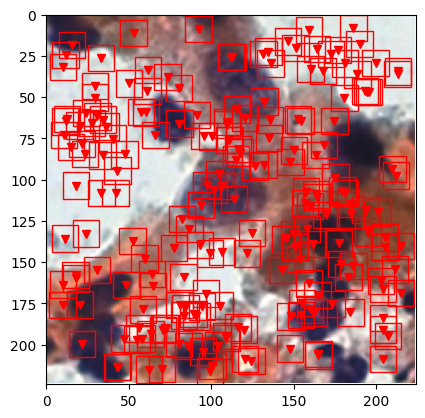

In [191]:
image_height = 224
image_width = 224
patch_size = (16, 16)
num_patches = 196
resized_image = im.resize((224,224))

patch_centers = generate_random_patch_centers(image_height, image_width, patch_size, num_patches)

# patch_centers = patch_centers[0:2]

print(len(patch_centers))
print(patch_centers)
visualize_patch_centers(resized_image, patch_centers, (16, 16))